In [14]:
import pandas as pd
import numpy as np
import time
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup

In [3]:
import pyupbit
from datetime import datetime,date
print(pyupbit.Upbit)

<class 'pyupbit.exchange_api.Upbit'>


In [4]:
BTC = pyupbit.get_ohlcv("KRW-BTC", count = 10000)
BTC   # 비트코인

,open,high,low,close,volume,value
2017-09-25 09:00:00,4201000.0,4333000.0,4175000.0,4322000.0,132.484755,5.602146e+08
2017-09-26 09:00:00,4317000.0,4418000.0,4311000.0,4321000.0,22.788340,9.950724e+07
2017-09-27 09:00:00,4322000.0,4677000.0,4318000.0,4657000.0,32.269662,1.448276e+08
2017-09-28 09:00:00,4657000.0,4772000.0,4519000.0,4586000.0,80.588243,3.721860e+08
2017-09-29 09:00:00,4586000.0,4709000.0,4476000.0,4657000.0,59.352373,2.724558e+08
...,...,...,...,...,...,...
2021-05-30 09:00:00,42688000.0,43827000.0,40580000.0,43177000.0,9194.807917,3.903808e+11
2021-05-31 09:00:00,43177000.0,44235000.0,41304000.0,43761000.0,10111.066220,4.336194e+11
2021-06-01 09:00:00,43761000.0,44550000.0,42515000.0,43200000.0,9081.150288,3.948303e+11
2021-06-02 09:00:00,43207000.0,44341000.0,42550000.0,43732000.0,7405.760642,3.217178e+11


In [5]:
del BTC['value']
del BTC['open']
del BTC['high']
del BTC['low']
del BTC['volume']

In [6]:
BTC = BTC.reset_index()
BTC

,index,close
0,2017-09-25 09:00:00,4322000.0
1,2017-09-26 09:00:00,4321000.0
2,2017-09-27 09:00:00,4657000.0
3,2017-09-28 09:00:00,4586000.0
4,2017-09-29 09:00:00,4657000.0
...,...,...
1343,2021-05-30 09:00:00,43177000.0
1344,2021-05-31 09:00:00,43761000.0
1345,2021-06-01 09:00:00,43200000.0
1346,2021-06-02 09:00:00,43732000.0


In [8]:
import pandas as pd
BTC.rename(columns = {'index' : 'time'}, inplace = True)
BTC.rename(columns = {'close' : 'price'}, inplace = True)
BTC['time'] = pd.to_datetime(BTC['time']).dt.normalize()
BTC1 = BTC.set_index('time')
BTC1

,price
time,
2017-09-25,4322000.0
2017-09-26,4321000.0
2017-09-27,4657000.0
2017-09-28,4586000.0
2017-09-29,4657000.0
...,...
2021-05-30,43177000.0
2021-05-31,43761000.0
2021-06-01,43200000.0


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


<class 'pandas.core.frame.DataFrame'>
Index: 1348 entries, 2017-09-25 to 2021-06-03
Data columns (total 1 columns):
price    1348 non-null float64
dtypes: float64(1)
memory usage: 21.1+ KB


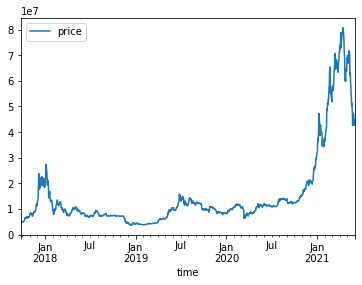

In [17]:
# 시각화
train = BTC1
train.plot()
plt.show()

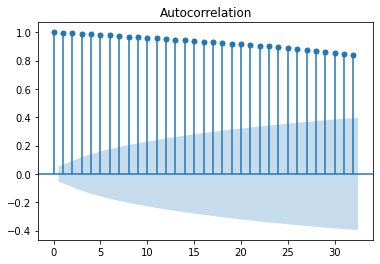

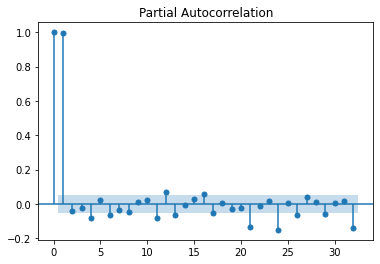

In [18]:
#ARIMA 의 order 파라미터 p,d,q의 최적 조합 찾기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(train)
plot_pacf(train)
plt.show()

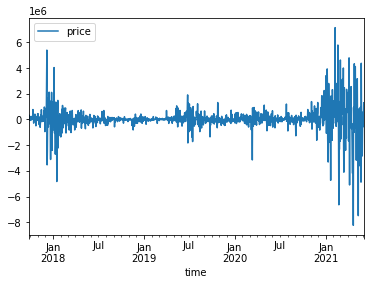

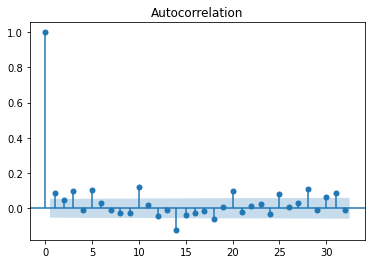

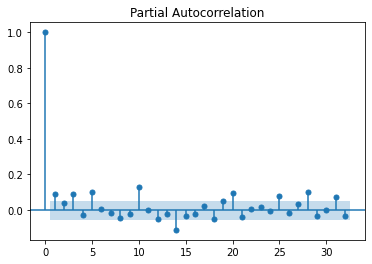

In [19]:
# 적절 차분 차수 d 계산 
tmp=train.diff(periods=1).iloc[1:]
tmp.plot()
plot_acf(tmp)
plot_pacf(tmp)
plt.show()

In [20]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

model = ARIMA(train.price.values, order=(0,2,1)) #파라미터 설정
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                 1346
Model:                 ARIMA(0, 2, 1)   Log Likelihood              -20405.103
Method:                       css-mle   S.D. of innovations         927029.930
Date:                Fri, 04 Jun 2021   AIC                          40816.206
Time:                        02:53:31   BIC                          40831.821
Sample:                             2   HQIC                         40822.055
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -307.7569    635.237     -0.484      0.628   -1552.799     937.285
ma.L1.D2.y    -0.9758      0.008   -121.205      0.000      -0.992      -0.960
                                    Roots           

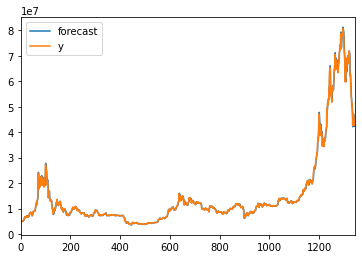

In [21]:
# 학습 데이터 예측 결과 -> 양호
fig = model_fit.plot_predict()

<AxesSubplot:>

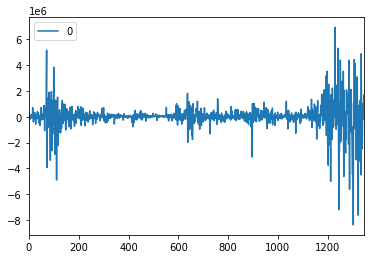

In [22]:
# 잔차의 변동 시각화
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
# 폭이 일정해야 좋음 -> 불규칙한 형태

In [49]:
pred_model = model_fit.forecast(steps=1500) #7일 예측
pred=pred_model[0].tolist()
pred

[45581899.114493504,
 46128490.47212151,
 46674774.072884016,
 47220749.91678102,
 47766418.00381253,
 48311778.333978534,
 48856830.90727904,
 49401575.72371404,
 49946012.78328354,
 50490142.085987546,
 51033963.63182605,
 51577477.420799054,
 52120683.45290656,
 52663581.72814856,
 53206172.24652506,
 53748455.00803606,
 54290430.012681566,
 54832097.26046157,
 55373456.75137607,
 55914508.48542507,
 56455252.46260857,
 56995688.682926565,
 57535817.14637907,
 58075637.85296607,
 58615150.80268757,
 59154355.99554357,
 59693253.43153407,
 60231843.11065906,
 60770125.032918565,
 61308099.198312566,
 61845765.606841065,
 62383124.25850406,
 62920175.15330156,
 63456918.291233554,
 63993353.672300056,
 64529481.296501055,
 65065301.16383655,
 65600813.27430655,
 66136017.627911046,
 66670914.22465004,
 67205503.06452353,
 67739784.14753152,
 68273757.47367401,
 68807423.042951,
 69340780.8553625,
 69873830.9109085,
 70406573.209589,
 70939007.751404,
 71471134.5363535,
 72002953.56443

In [39]:
bit = pd.read_csv('../upbit/data/bitcoin.csv', encoding='utf-8', index_col=0)

In [43]:
test = bit[['close']]

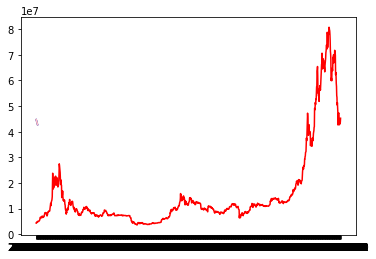

In [36]:
plt.plot(pred, color="blue") # 예측 가격
plt.plot(pred_lower, color = "gray") # 예측 최저가격
plt.plot(pred_upper, color = "pink") # 예측 최고가격
plt.plot(test, color = "red") # 실제가격

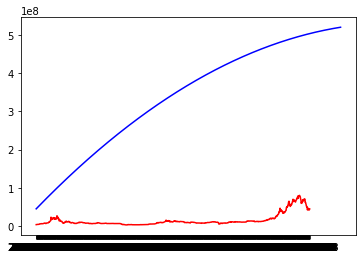

In [50]:
plt.plot(pred, color="blue") # 예측 가격
plt.plot(test, color = "red") # 실제가격

In [22]:
from sklearn.metrics import mean_squared_error
import math

rmse = math.sqrt(mean_squared_error(pred, test_y))
print(rmse)

NameError: name 'test_y' is not defined